# Logistic Regression

Logistic Regression is a machine learning method used for classification. While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the most probable class for that data point. For this, we use Logistic Regression 

Let's recall linear regression. As we know, Linear regression finds a function that relates a continuous dependent variable, y, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, Simple linear regression assumes a function of the form $y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots$, and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc. It can be generally shown as: $h_\theta(𝑥) = \theta^TX$.

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables. Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:
<br>
<br>
$$h_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {1}{1 + e^{-(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}$$
    
$h_\theta(x)$ can be interpreted as probability of a certain observation belonging to a certain class. In simple words, $\theta^TX$ as calculated by linear regression is supplied to the sigmoid function which gives us a probabability value. 

The objective of Logistic regression is to find the best parameters $\theta_i$, for $h_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case. Note that in logistic regression, not only do we predict the class of each case, we also measure the probability of a case belonging to a specific class.

The main objective of training in logistic regression is to find the best parameters $\theta_i$ which minimizes the error, or cost function. The cost function for logistic regression is the log-loss defined at the end of this notebook.

## Data Pre-Processing

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Our aim is to find out who is leaving and why. In this notebook, we will create a Logistic Regression model to predict when its customers will leave for a competitor, so that they can take some action to retain the customers.

We use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.

This data set provides information to predict what behavior will help to retain customers. We analyze all relevant customer data and develop focused customer retention programs. The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [2]:
df = pd.read_csv('churn_data.csv')

In [3]:
df.head()

tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   

   longmon  ...  pager  internet  callwait  confer  ebill  loglong  logtoll  \
0     4.40  ...    1.0       0.0       1.0     1.0    0.0    1.482    3.033   
1     9.45  ...    0.0       0.0       0.0     0.0    0.0    2.246    3.240   
2     6.30  ...    0.0       0.0       0.0     1.0    0.0    1.841    3.240   
3     6.05  ...    1.0       1.0       1.0     1.0    1.0    1.800    3.807   
4     7.10  ...    0.0       0.0       1.0     1.0    0.0    1.960    3.091   

   lninc  custcat  churn  
0  4.913      4.0    1.0  
1  3.497      1.0    1.0  
2  3.401      3.0    0.0  
3  4.331      4.0    0.0  
4  4.382      3.0    0.0  

[5 rows x 28 columns]

Let's select some features for the modeling. We change the target datatype to int (required by scikit-learn algorithm)

In [4]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']]
df['churn'] = df['churn'].astype(int)

In [5]:
df.head()

tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   

   churn  
0      1  
1      1  
2      0  
3      0  
4      0

Let's define the feature matrix X and the target vector y:

In [6]:
X = np.array(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.array(df['churn'])

Let's normalize the dataset 

In [7]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

Now, we split our dataset into train-test datasets

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

print('Train set : ', X_train.shape, y_train.shape)
print('Test set : ', X_test.shape, y_test.shape)

Train set :  (160, 7) (160,)
Test set :  (40, 7) (40,)


## Modeling (Logistic Regression)

We now build our model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. The version of Logistic Regression in Scikit-learn, supports regularization. Regularization is a technique used to solve the overfitting problem in machine learning models. Parameter __C__ indicates inverse of regularization strength, which must be a positive float. Smaller values specify stronger regularization.

Now lets fit our model with train set:

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train, y_train)

Now, we can use this to make predictions on our test set

In [10]:
yhat = lr.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [11]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

Function __predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [12]:
yhat_prob = lr.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

Let's try **Jaccard index** for accuracy evaluation:

In [13]:
from sklearn.metrics import jaccard_similarity_score

jaccard_similarity_score(y_test, yhat)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.75

Another way of looking at accuracy of a classifier is to look at **confusion matrix**:

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    """This function prints/plots the confusion  matrix. Normalization can be applied by setting normalize = True"""
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')

    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
print(confusion_matrix(y_test, yhat, labels = [1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


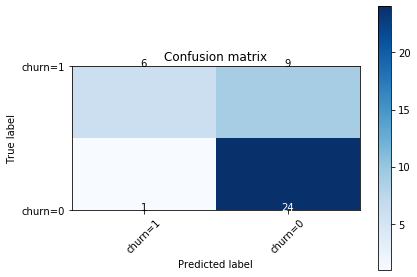

In [15]:
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)

# plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['churn=1', 'churn=0'], normalize = False, title = 'Confusion matrix')

The first and second row is for customers whose actual churn value in test set is 1 and 0 respectively. As we can see, out of 40 customers, the churn value of 15 of them is 1, and for the rest 25 it is 0.

Now, out of these 15 (actual churn value 1), the classifier correctly predicted 6 of them as 1, and 9 of them as 0. It means, for 6 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 9 customers were 1, the classifier predicted those as 0, which is not very good. We can consider it as error of the model for first row.

Now, for the rest 25 (actual churn value 0), the classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. 

A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes.  In specific case of binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives.

In [16]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Based on the count of each section, we can calculate precision and recall of each label:

- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate precision and recall of each class.

__F1 score:__ Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

$$\text{F1-score} = \frac{2*\text{Precision}*\text{Recall}}{\text{Precision}+\text{Recall}}$$

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision

And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

### Log Loss

Sometimes, the output of a classfier is the probability of a class label, instead of the label. For example, in logistic regression, the output can be the probability of customer churn, i.e., yes (or equals to 1). This probability is a value between 0 and 1. A value close to 1 means the label is 1, whereas a value close to 0 means the label is 0. 

Logarithmic loss (log-loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. The log loss is given by

$$\text{log-loss} = -\frac{1}{m}\sum y\log(\hat{y}) + (1-y)\log(1-\hat{y})$$

Here, $y$ is the actual label (0 or 1), and $\hat{y}$ is the probability value. The sum is over all the $m$ data points

If all $\hat{y}$ are exactly accurate, with probability $\hat{y} = 1.0$ for actual label = 1, and probability $\hat{y} = 0$ for actual label = 0, the log loss is exactly zero, which is the best case.

If $\hat{y}$ is a small value (say 0.2) for actual label = 1, or high value (0.98) for actual label = 0, we obtain high log-loss.

It is clear that more ideal classifiers have progressively smaller values of log loss. So, the classifier with the lower log-loss has better accuracy.

In [17]:
from sklearn.metrics import log_loss

log_loss(y_test, yhat_prob)

0.6017092478101185